## 绘图准备函数

In [1]:
def linestyle_generator():
    """
    生成绘图用的线型
    """
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID=(lineID + 1) % len(linestyle)


def plot_set(fig_ax,*args):
    """
    设置绘图的样式
    """
    fig_ax.set_xlabel(args[0]) #x轴标签
    fig_ax.set_ylabel(args[1]) #y轴标签
    fig_ax.grid(ls=':') # 
    if len(args)==3:
        fig_ax.legend(loc=args[2]) # 图例位置


# 波特图  伯德图  就是频率的对数图像
def bodeplot_set(fig_ax, *args):
    """
    设置bode图的样式
    """
    fig_ax[0].grid(which='both', ls=':') # 网格线
    fig_ax[0].set_ylabel('Gain [dB]') # y轴标签 # 幅值

    fig_ax[1].grid(which='both', ls=':') # 网格线
    fig_ax[1].set_xlabel('Frequency: $\omega$ [rad/s]') # x轴标签   # 频率
    fig_ax[1].set_ylabel('Phase [deg]') # 相位

    if  len(args) > 0:
        fig_ax[1].legend(loc=args[0]) # 图例位置 # 参数个数大于1 显示频幅图
    if  len(args) > 1:
        fig_ax[0].legend(loc=args[1]) # 图例位置 # 参数个数大于2 同时显示相位频率图
     

## 稳定性

### 发散情形

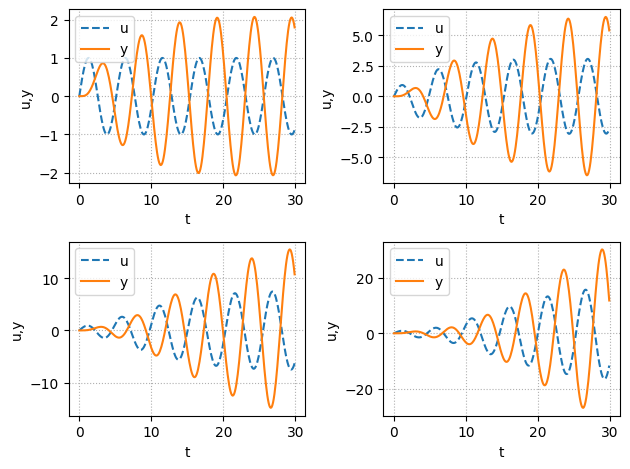

In [4]:
import matplotlib.pyplot as plt
# import control as ctrl
import numpy as np  
import control.matlab as ctm


P = ctm.tf([0,1], [1, 1,1.5, 1])  # 被控对象

#得到相位180deg频率
_,_,wpc,_ = ctm.margin(P)

t=np.arange(0,30,0.1) # 时间序列
u=np.sin(wpc*t)
y = 0*u
fig,ax = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        # 负反馈加入下一刻输入
        u=np.sin(wpc*t)-y
        y,t,x0=ctm.lsim(P,u,t,0)

        ax[i,j].plot(t,u,ls='--',label='u')
        ax[i,j].plot(t,y,label='y')
        plot_set(ax[i,j],'t','u,y','best')

fig.tight_layout()




### 收敛情形

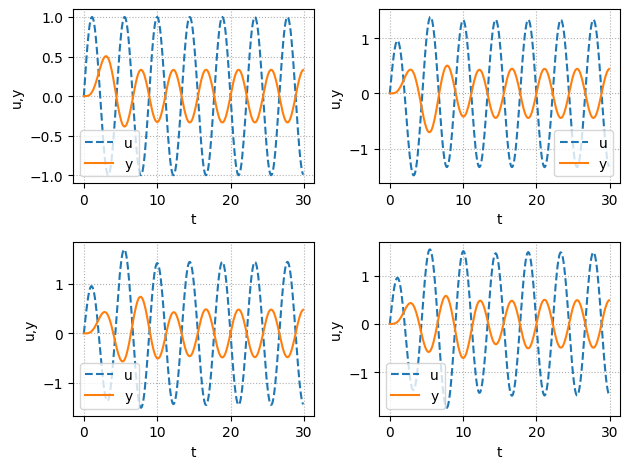

In [5]:
import matplotlib.pyplot as plt
# import control as ctrl
import numpy as np  
import control.matlab as ctm


P = ctm.tf([0,1], [1, 2,2, 1])  # 被控对象

#得到相位180deg频率
_,_,wpc,_ = ctm.margin(P)

t=np.arange(0,30,0.1) # 时间序列
u=np.sin(wpc*t)
y = 0*u
fig,ax = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        # 负反馈加入下一刻输入
        u=np.sin(wpc*t)-y
        y,t,x0=ctm.lsim(P,u,t,0)

        ax[i,j].plot(t,u,ls='--',label='u')
        ax[i,j].plot(t,y,label='y')
        plot_set(ax[i,j],'t','u,y','best')

fig.tight_layout()




### 奈奎斯特判据图

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


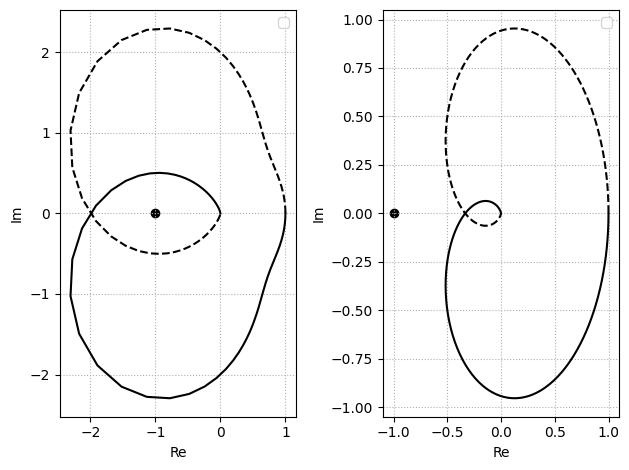

In [ ]:
fig,ax = plt.subplots(1,2)

# 被控对象1  发散系统
P = ctm.tf([0,1], [1, 1,1.5, 1])  
x,y,_ = ctm.nyquist(P,ctm.logspace(-3,5,1000),Plot =False   )
ax[0].plot(x,y,color='k')  
ax[0].plot(x,-y,ls='--',color='k')  
ax[0].scatter(-1,0,color='k')
plot_set(ax[0],'Re','Im','best')

# 被控对象2  稳定系统
P = ctm.tf([0,1], [1, 2,2, 1])  
x,y,_ = ctm.nyquist(P,ctm.logspace(-3,5,1000),Plot =False   )
ax[1].plot(x,y,color='k')  
ax[1].plot(x,-y,ls='--',color='k')  
ax[1].scatter(-1,0,color='k')
plot_set(ax[1],'Re','Im','best')
  
fig.tight_layout()
 

## 开环方式考虑PID

In [22]:
import matplotlib.pyplot as plt 
import numpy as np  
import control.matlab as ctm

g = 9.81 
l=0.2
M=0.5
mu=1.5e-2
J=1.0e-2

P = ctm.tf([0,1],[J,mu,M*g*l])

ref=30
 
LS = linestyle_generator()

### 考虑P控制

kP= 0.5
增益裕度:GM:      inf
相位裕度:PM:      21.156175957298814
增益穿越频率:wpc:     nan
相位穿越频率:wgc:     12.030378476260191
------------
kP= 1
增益裕度:GM:      inf
相位裕度:PM:      12.118321095140175
增益穿越频率:wpc:     nan
相位穿越频率:wgc:     13.995414100411576
------------
kP= 2
增益裕度:GM:      inf
相位裕度:PM:      7.419183191955369
增益穿越频率:wpc:     nan
相位穿越频率:wgc:     17.217014751495988
------------


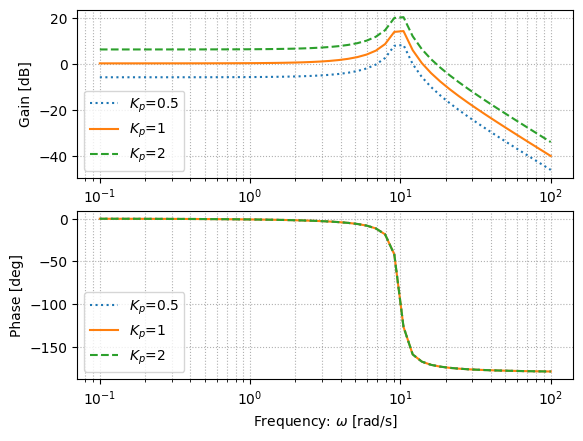

In [27]:
 
fig,ax = plt.subplots(2,1)
 
kp=(0.5,1,2) 
for i in range(len(kp)): 
    K = ctm.tf([0,kp[i]],[0,1])  # P控制器
    H = K*P  # 开环传递函数
    gain,phase,w = ctm.bode(H,ctm.logspace(-1,2),Plot=False) # 频率响应

    pltargs={'ls':next(LS),'label':'$K_p$='+str(kp[i])  }
    ax[0].semilogx(w,20*np.log10(gain),**pltargs) # 幅值
    ax[1].semilogx(w,phase*180/np.pi,**pltargs) # 相位

    #
    print('kP=',kp[i]   )
    print('增益裕度:GM:     ', ctm.margin(H)[0])
    print('相位裕度:PM:     ',ctm.margin(H)[1]  )
    print('增益穿越频率:wpc:    ',ctm.margin(H)[2]  )
    print('相位穿越频率:wgc:    ',ctm.margin(H)[3]  )
 
    print('------------')

bodeplot_set(ax,3,'best')


### 考虑PI控制

d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\margins.py:378: RuntimeWarning: invalid value encountered in less_equal
  w_180 = w_180[w180_resp <= 0.]
d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\margins.py:379: RuntimeWarning: invalid value encountered in less_equal
  w180_resp = w180_resp[w180_resp <= 0.]


kp= 2 , ki= 0
增益裕度:GM:      inf
相位裕度:PM:      7.419183191955369
增益穿越频率:wpc:     nan
相位穿越频率:wgc:     17.217014751495988
------------
(GM,PM,wpc,wgc)= (inf, 7.419183191955369, nan, 17.217014751495988)
------------
kp= 2 , ki= 5
增益裕度:GM:      0.7357499999999995
相位裕度:PM:      -0.8650925865891281
增益穿越频率:wpc:     15.660459763365822
相位穿越频率:wgc:     17.277561531058744
------------
(GM,PM,wpc,wgc)= (0.7357499999999995, -0.8650925865891281, 15.660459763365822, 17.277561531058744)
------------
kp= 2 , ki= 10
增益裕度:GM:      0.21021428571428594
相位裕度:PM:      -8.761363396424741
增益穿越频率:wpc:     11.838194843085544
相位穿越频率:wgc:     17.449792931547854
------------
(GM,PM,wpc,wgc)= (0.21021428571428594, -8.761363396424741, 11.838194843085544, 17.449792931547854)
------------


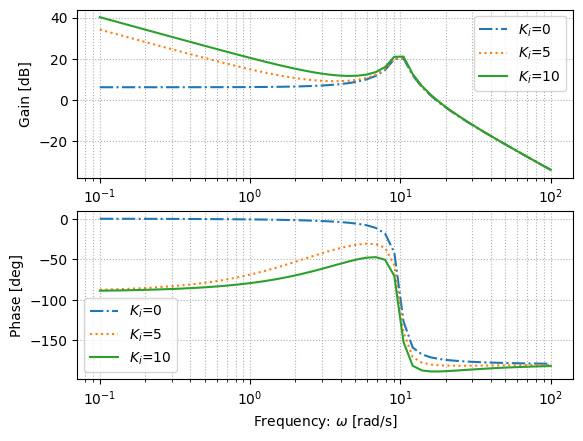

In [28]:
fig,ax = plt.subplots(2,1)

kp=2
ki=(0,5,10) 

for i in range(len(ki)): 
    K = ctm.tf([kp,ki[i]],[1,0])  # P控制器
    H = K*P  # 开环传递函数
    gain,phase,w = ctm.bode(H,ctm.logspace(-1,2),Plot=False) # 频率响应

    pltargs={'ls':next(LS),'label':'$K_i$='+str(ki[i])  }
    ax[0].semilogx(w,20*np.log10(gain),**pltargs) # 幅值
    ax[1].semilogx(w,phase*180/np.pi,**pltargs) # 相位

    #
    print('kp=',kp,',','ki=',ki[i]   )
    print('增益裕度:GM:     ', ctm.margin(H)[0])
    print('相位裕度:PM:     ',ctm.margin(H)[1]  )
    print('增益穿越频率:wpc:    ',ctm.margin(H)[2]  )
    print('相位穿越频率:wgc:    ',ctm.margin(H)[3]  )

    print('------------')
    print("(GM,PM,wpc,wgc)=",ctm.margin(H)  ) 
    print('------------')

bodeplot_set(ax,3,'best')


#### PI的内阶跃响应

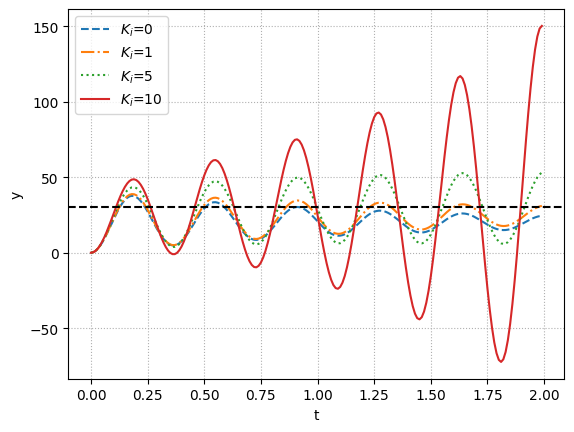

In [29]:

fig,ax = plt.subplots()

kp=2
ki=(0,1,5,10) 
for i in range(len(ki)):
    K = ctm.tf([kp,ki[i]],[1,0])  # PI控制器
    Gyr = ctm.feedback(K*P,1)  # 闭环传递函数
    y,t  = ctm.step(Gyr,np.arange(0,2,0.01)) # 阶跃响应
    pltargs={'ls':next(LS),'label':'$K_i$='+str(ki[i])  }
    ax.plot(t,y*ref,**pltargs)  

ax.axhline(ref,ls='--',color='k')   
plot_set(ax,'t','y','best')



### 考虑PID控制

d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


kp= 2 ki= 5 , kd= 0
增益裕度:GM:      0.7357499999999995
相位裕度:PM:      -0.8650925865891281
增益穿越频率:wpc:     15.660459763365822
相位穿越频率:wgc:     17.277561531058744
------------
(GM,PM,wpc,wgc)= (0.7357499999999995, -0.8650925865891281, 15.660459763365822, 17.277561531058744)
------------
kp= 2 ki= 5 , kd= 0.1
增益裕度:GM:      inf
相位裕度:PM:      45.21166550163886
增益穿越频率:wpc:     nan
相位穿越频率:wgc:     18.803688976275325
------------
(GM,PM,wpc,wgc)= (inf, 45.21166550163886, nan, 18.803688976275325)
------------
kp= 2 ki= 5 , kd= 0.2
增益裕度:GM:      inf
相位裕度:PM:      71.27186124757236
增益穿越频率:wpc:     nan
相位穿越频率:wgc:     24.730240225794653
------------
(GM,PM,wpc,wgc)= (inf, 71.27186124757236, nan, 24.730240225794653)
------------


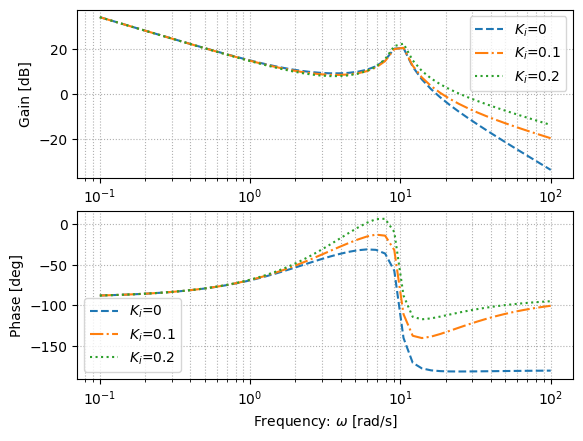

In [30]:
fig,ax = plt.subplots(2,1)

kp=2
ki=5
kd=(0,0.1,0.2)

for i in range(len(kd)): 
    K = ctm.tf([kd[i],kp,ki],[1,0])  # P控制器
    H = K*P  # 开环传递函数
    gain,phase,w = ctm.bode(H,ctm.logspace(-1,2),Plot=False) # 频率响应

    pltargs={'ls':next(LS),'label':'$K_i$='+str(kd[i])  }
    ax[0].semilogx(w,20*np.log10(gain),**pltargs) # 幅值
    ax[1].semilogx(w,phase*180/np.pi,**pltargs) # 相位

    #
    print('kp=',kp,'ki=',ki,',','kd=',kd[i]   )
    print('增益裕度:GM:     ', ctm.margin(H)[0])
    print('相位裕度:PM:     ',ctm.margin(H)[1]  )
    print('增益穿越频率:wpc:    ',ctm.margin(H)[2]  )
    print('相位穿越频率:wgc:    ',ctm.margin(H)[3]  )

    print('------------')
    print("(GM,PM,wpc,wgc)=",ctm.margin(H)  ) 
    print('------------')

bodeplot_set(ax,3,'best')


#### PID内的阶跃响应

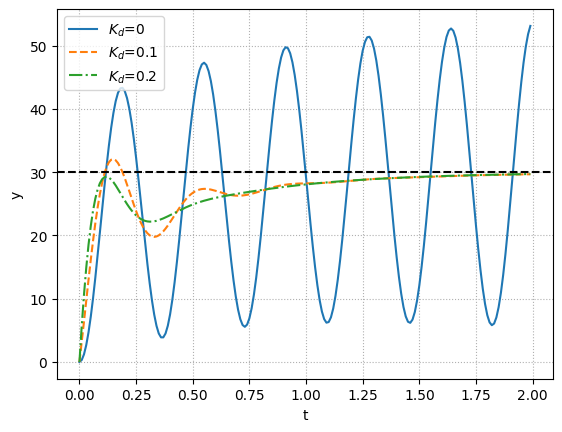

In [31]:

fig,ax = plt.subplots()

kp=2
ki=5
kd=(0,0.1,0.2)
for i in range(len(kd)):
    K = ctm.tf([kd[i],kp,ki],[1,0])  # PI控制器
    Gyr = ctm.feedback(K*P,1)  # 闭环传递函数
    y,t  = ctm.step(Gyr,np.arange(0,2,0.01)) # 阶跃响应
    pltargs={'ls':next(LS),'label':'$K_d$='+str(kd[i])  }
    ax.plot(t,y*ref,**pltargs)  

ax.axhline(ref,ls='--',color='k')   
plot_set(ax,'t','y','best')



### 设计前后开环波特图比较

d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


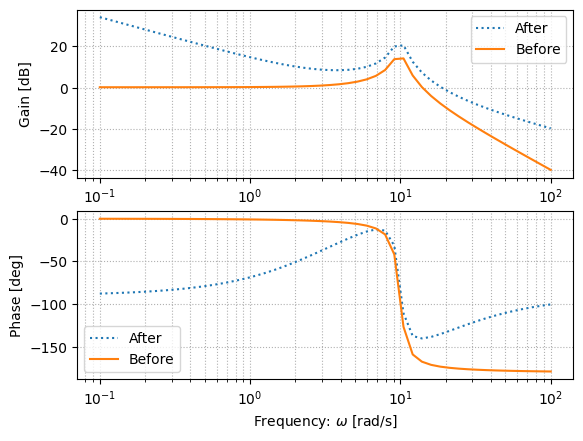

In [ ]:
kp=(2,1)
ki=(5,0)
kd=(0.1,0)


Label=('After','Before')
fig,ax = plt.subplots(2,1)

for i in range(2):    
    K = ctm.tf([kd[i],kp[i],ki[i]],[1,0])  # P控制器
    H=P*K
    gain,phase,w = ctm.bode(H,ctm.logspace(-1,2),Plot=False) # 频率响应

    pltargs={'ls':next(LS),'label':Label[i]  }
    ax[0].semilogx(w,20*np.log10(gain),**pltargs) # 幅值
    ax[1].semilogx(w,phase*180/np.pi,**pltargs) # 相位

bodeplot_set(ax,3,'best')
 


### 设计前后闭环波特图比较

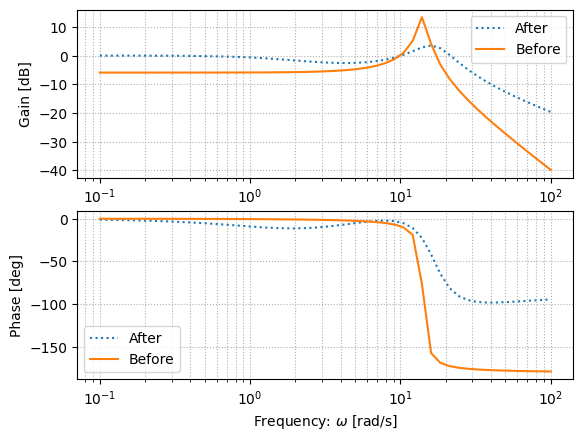

In [34]:
kp=(2,1)
ki=(5,0)
kd=(0.1,0)


Label=('After','Before')
fig,ax = plt.subplots(2,1)

for i in range(2):    
    K = ctm.tf([kd[i],kp[i],ki[i]],[1,0])  # P控制器
    Gyr=ctm.feedback(P*K,1)  # 闭环传递函数
    Gyr=Gyr.minreal()
    gain,phase,w = ctm.bode(Gyr,ctm.logspace(-1,2),Plot=False) # 频率响应

    pltargs={'ls':next(LS),'label':Label[i]  }
    ax[0].semilogx(w,20*np.log10(gain),**pltargs) # 幅值
    ax[1].semilogx(w,phase*180/np.pi,**pltargs) # 相位

bodeplot_set(ax,3,'best')
 


#### 闭环阶跃响应图

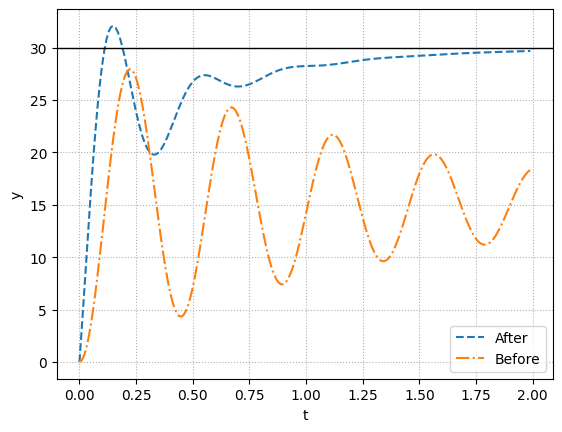

In [39]:

Label=('After','Before')
fig,ax = plt.subplots()
kp=(2,1)
ki=(5,0)
kd=(0.1,0)
for i in range(2):
    K = ctm.tf([kd[i],kp[i],ki[i]],[1,0])  # PI控制器
    Gyr = ctm.feedback(P*K ,1)  # 闭环传递函数
    y,t  = ctm.step(Gyr,np.arange(0,2,0.01)) # 阶跃响应
    pltargs={'ls':next(LS),'label':Label[i]  }
    ax.plot(t,y*ref,**pltargs)  

ax.axhline(ref,color='k',linewidth=1)   
plot_set(ax,'t','y','best')



## 相位超前滞后校正

### 相位滞后校正


$\Kappa_1(s)=\alpha\frac{T_1 s+1}{\alpha T_1 s+1} , \alpha >1$

d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


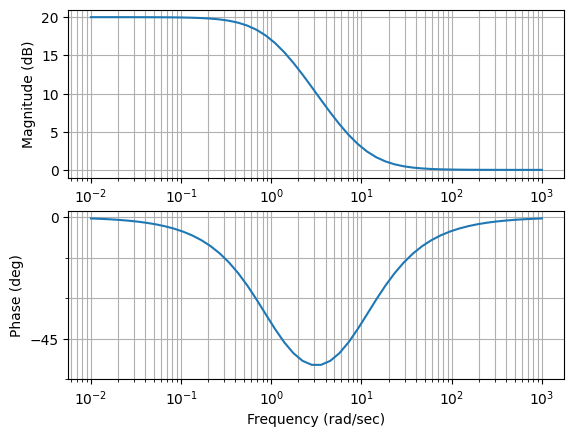

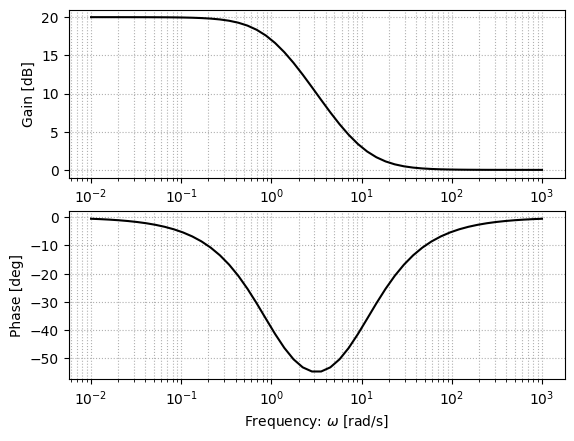

In [41]:
alpha  =10
T1=0.1
K1=ctm.tf([alpha*T1,alpha],[alpha*T1,1])

gain,phase,w = ctm.bode(K1,ctm.logspace(-2,3),Plot=True) # 频率响应

fig,ax = plt.subplots(2,1)

ax[0].semilogx(w,20*np.log10(gain),color='k') # 幅值   
ax[1].semilogx(w,phase*180/np.pi,color='k') # 相位
bodeplot_set(ax)
 

### 相位超前校正
 

$\Kappa_2(s)= \frac{T_2 s+1}{\beta T_2 s+1} , \beta <1$


d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


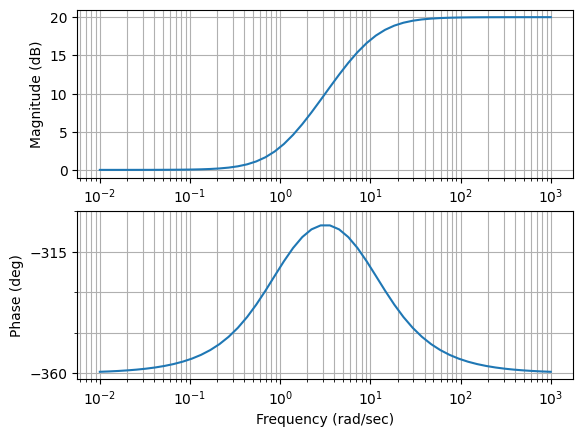

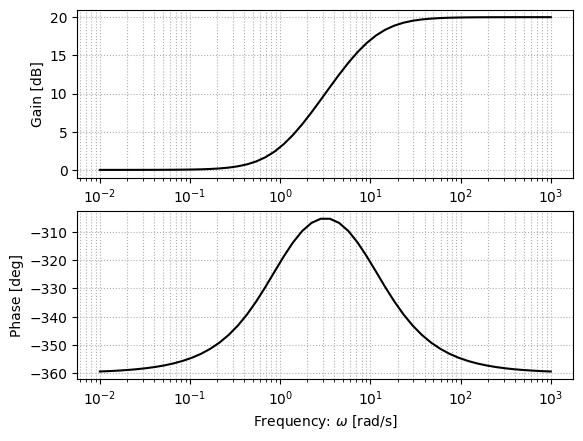

In [42]:
beta  =0.1
T2=1
K2=ctm.tf([T2,1],[beta*T2,1])

gain,phase,w = ctm.bode(K2,ctm.logspace(-2,3),Plot=True) # 频率响应

fig,ax = plt.subplots(2,1)

ax[0].semilogx(w,20*np.log10(gain),color='k') # 幅值   
ax[1].semilogx(w,phase*180/np.pi,color='k') # 相位
bodeplot_set(ax)
 

### 用于机械臂控制的系统设计

$\Kappa(s)=k\Kappa_1(s)\Kappa_2(s)$

设计规定 增益穿越频率为 $40rad/s$,相位裕度为 $60deg$



#### 设计相位滞后校正

K1  = 
5 s + 20
--------
5 s + 1

------------
mag  at 40rad/s= -23.496640796972535
phase at 40rad/s= 176.8635987273622


d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


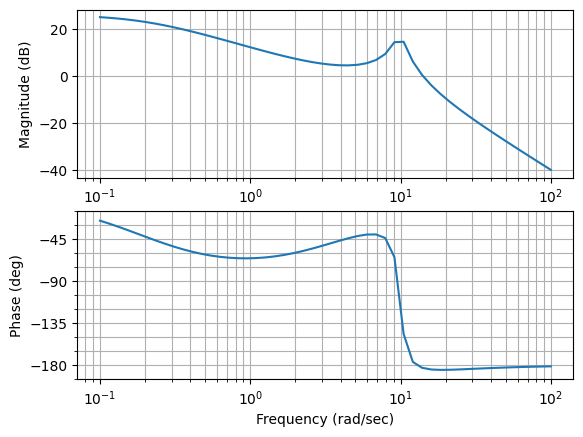

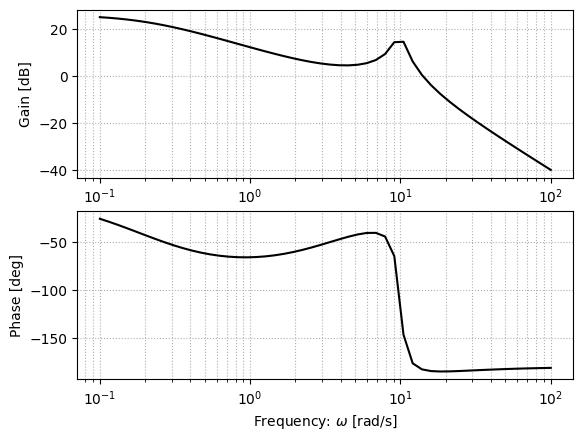

In [49]:
alpha  =20
T1=0.25
K1=ctm.tf([alpha*T1,alpha],[alpha*T1,1])
print('K1  =',K1   )

H1=P*K1 #开环

gain,phase,w = ctm.bode(H1,ctm.logspace(-1,2),Plot=True) # 频率响应

fig,ax = plt.subplots(2,1)

ax[0].semilogx(w,20*np.log10(gain),color='k') # 幅值   
ax[1].semilogx(w,phase*180/np.pi,color='k') # 相位
bodeplot_set(ax)

mag,phase,omega=ctm.freqresp(H1,[40])

magH1at40=20*np.log10(mag [0] )
phaseH1at40=phase[0] *(180/np.pi)
print('------------')
print('mag  at 40rad/s=',magH1at40    )
print('phase at 40rad/s=',phaseH1at40   )
 

#### 设计相位超前校正

K2  = 
 0.1047 s + 1
--------------
0.005971 s + 1

------------
mag  at 40rad/s= -11.058061395752677
phase at 40rad/s= -119.99999999999997


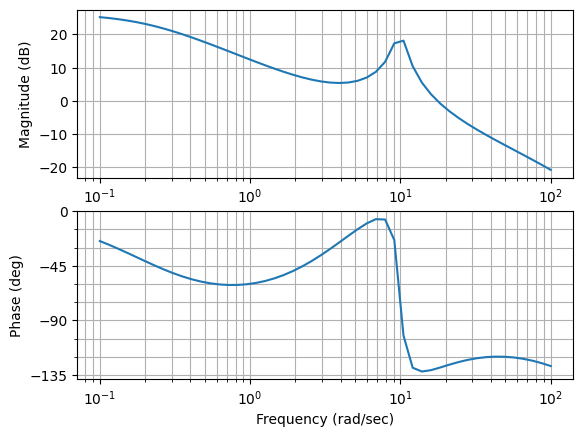

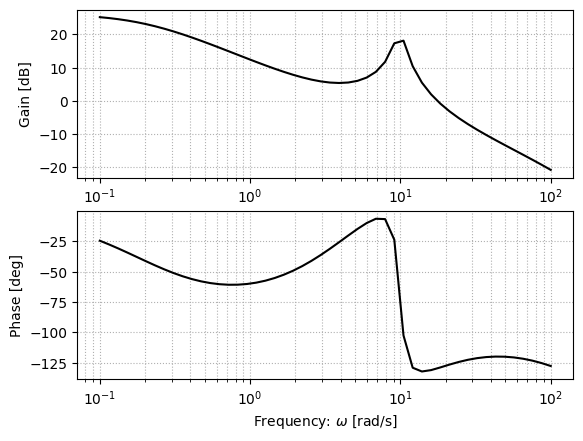

In [50]:
phim=(60-(180+phaseH1at40))*np.pi/180
beta = (1-np.sin(phim))/(1+np.sin(phim))


T2 = 1/40/np.sqrt(beta)
K2 = ctm.tf([T2,1],[beta*T2,1])
print('K2  =',K2   )
 
H2=P*K1*K2 #开环

gain,phase,w = ctm.bode(H2,ctm.logspace(-1,2),Plot=True) # 频率响应

fig,ax = plt.subplots(2,1)

ax[0].semilogx(w,20*np.log10(gain),color='k') # 幅值   
ax[1].semilogx(w,phase*180/np.pi,color='k') # 相位
bodeplot_set(ax)

mag,phase,omega=ctm.freqresp(H2,[40])

magH1at40=20*np.log10(mag [0] )
phaseH1at40=phase[0] *(180/np.pi)
print('------------')
print('mag  at 40rad/s=', magH1at40  )
print('phase at 40rad/s=',phaseH1at40   )
 

#### 增益校正设计

k  = [3.57193107]
------------
(GM,PM,wpc,wgc)= (inf, 60.00000000000003, nan, 40.0)


d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


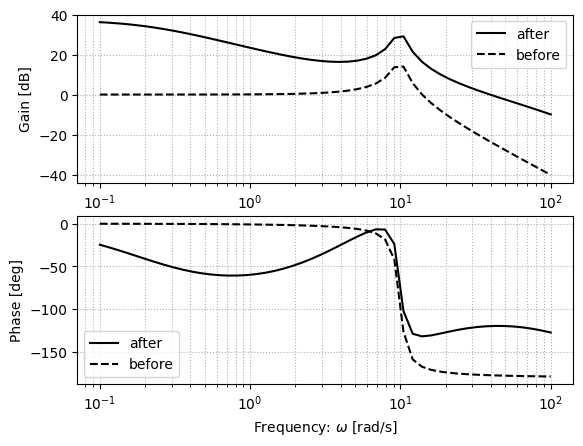

In [69]:
k=1/mag
print('k  =',k   )

H=P*k*K1*K2 #开环

fig,ax =plt.subplots(2,1)


gain,phase,w = ctm.bode(H,ctm.logspace(-1,2),Plot=False) # 频率响应
ax[0].semilogx(w,20*np.log10(gain),color='k',label='after') # 幅值
ax[1].semilogx(w,phase*180/np.pi,color='k',label='after' ) # 相位


gain,phase,w = ctm.bode(P,ctm.logspace(-1,2),Plot=False) # 频率响应
ax[0].semilogx(w,20*np.log10(gain),color='k',ls='--' ,label='before') # 幅值
ax[1].semilogx(w,phase*180/np.pi,color='k',ls='--',label='before') # 相位

bodeplot_set(ax,3,'best')


print('------------')
print("(GM,PM,wpc,wgc)=",ctm.margin(H)  )



#### 设计后阶跃响应

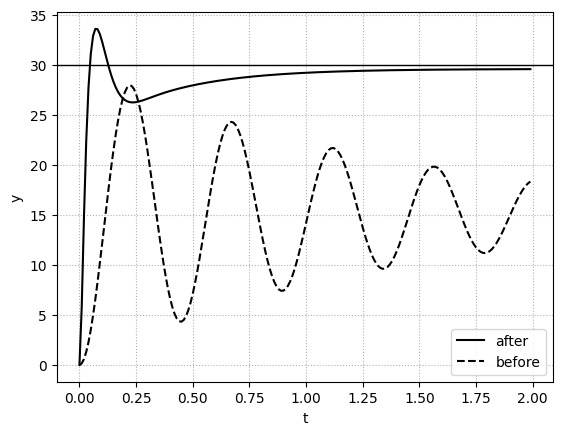

In [70]:

fig,ax = plt.subplots()

Gyr_H = ctm.feedback(H,1)  # 闭环传递函数
y,t  = ctm.step(Gyr_H,np.arange(0,2,0.01)) # 阶跃响应
ax.plot(t,y*ref,label='after',color='k')  


Gyr_P = ctm.feedback(P,1)  # 闭环传递函数
y,t  = ctm.step(Gyr_P,np.arange(0,2,0.01)) # 阶跃响应
ax.plot(t,y*ref,label='before',ls="--",color='k')  

ax.axhline(ref, color='k',linewidth=1   )   
plot_set(ax,'t','y','best')



#### 设计前后波特图


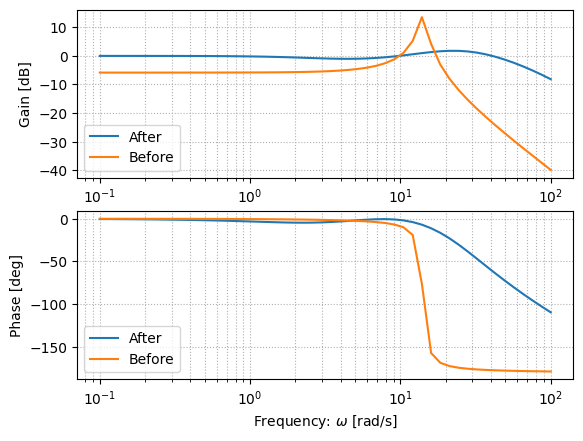

In [ ]:
 
 
fig,ax = plt.subplots(2,1)

 
gain,phase,w = ctm.bode(Gyr_H,ctm.logspace(-1,2),Plot=False) # 频率响应 
ax[0].semilogx(w,20*np.log10(gain),label='After' ) # 幅值
ax[1].semilogx(w,phase*180/np.pi,label='After') # 相位

 
gain,phase,w = ctm.bode(Gyr_P,ctm.logspace(-1,2),Plot=False) # 频率响应 
ax[0].semilogx(w,20*np.log10(gain),ls="--",label='Before' ) # 幅值
ax[1].semilogx(w,phase*180/np.pi,ls="--",label='Before') # 相位
 

bodeplot_set(ax,3,'best')
 
